In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv(r"D:\Aditi_2021\ML\Kaggle_Housing\train.csv")
df.head()

,postedby,uc,rera,bhk,b_r,sq_ft,move_ready,resale,address,LONGITUDE,LATITUDE,price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Data Cleaning

In [6]:
df["city"]=df["address"].apply(lambda x:x.split(",")[1])

In [7]:
df["location"]=df["address"].apply(lambda x:x.split(",")[0])

In [8]:
df.drop(["address"],inplace=True,axis=1)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.to_csv("D:\Aditi_2021\ML\Kaggle_Housing\Cleaned_train.csv")

In [11]:
df=pd.read_csv(r"D:\Aditi_2021\ML\Kaggle_Housing\Cleaned_train.csv")

# Exploratory Data Analysis

In [12]:
df['bhk'].value_counts()[:5] #most people prefer 2 or 3 bhk

2    13324
3    10546
1     3574
4     1723
5      190
Name: bhk, dtype: int64

<AxesSubplot:>

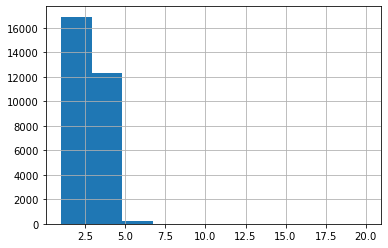

In [13]:
df.bhk.hist()

<AxesSubplot:>

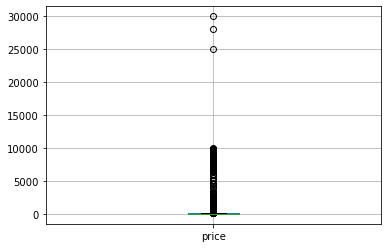

In [15]:
df.boxplot(column=["price"]) #there are 3 outliers

In [16]:
df_cat = df[["postedby","uc","resale"]]

graph for postedby: total=3


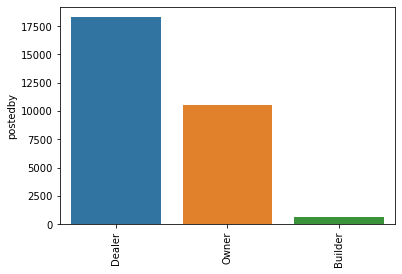

graph for uc: total=2


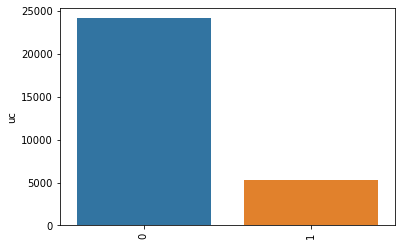

graph for resale: total=2


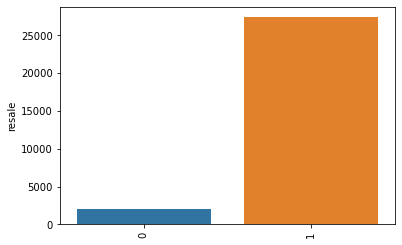

In [17]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total=%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for resale: total=13


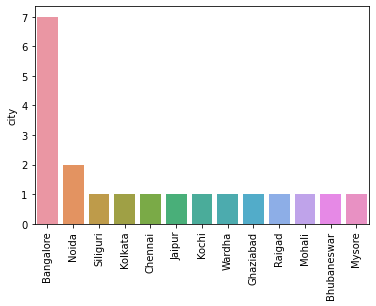

In [18]:
cat_num=df["city"][:20].value_counts()
print("graph for %s: total=%d"%(i,len(cat_num)))
chart=sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [19]:
pd.pivot_table(df,index="rera",values="price")

,price
rera,
0,112.566951
1,207.974586


<AxesSubplot:xlabel='bhk', ylabel='price'>

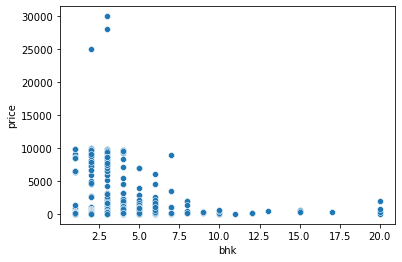

In [23]:
sns.scatterplot(x="bhk",y="price",data=df)

# Model Building (Multilinear Regression) 

In [25]:
df.describe()

,Unnamed: 0,uc,rera,bhk,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,price
count,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,14725.000000,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,8501.915725,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,7362.500000,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,14725.000000,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,22087.500000,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,29450.000000,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# Rmoving Outliers

In [26]:
Q1=df.bhk.quantile(0.25)
Q3=df.bhk.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.bhk>lower)&(df.bhk<upper)]

In [27]:
Q1=df.sq_ft.quantile(0.25)
Q3=df.sq_ft.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.sq_ft>lower)&(df.sq_ft<upper)]

In [28]:
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.price>lower)&(df.price<upper)]

In [29]:
Q1=df.LONGITUDE.quantile(0.25)
Q3=df.LONGITUDE.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.LONGITUDE>lower)&(df.LONGITUDE<upper)]

In [30]:
Q1=df.LATITUDE.quantile(0.25)
Q3=df.LATITUDE.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.LATITUDE>lower)&(df.LATITUDE<upper)]

In [31]:
df.to_csv("D:\Aditi_2021\ML\Kaggle_Housing\TrainDataWithoutOutliers.csv")

In [51]:
df=pd.read_csv(r"D:\Aditi_2021\ML\Kaggle_Housing\TrainDataWithoutOutliers.csv")

# Model using Sklearn

In [33]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [52]:
scaler=preprocessing.StandardScaler()

In [100]:
Xtrain=df[["sq_ft","bhk"]]

In [101]:
Xtrain[:3]

,sq_ft,bhk
0,1300.236407,2
1,1275.000000,2
2,933.159722,2


In [137]:
Xtrainarr=scaler.fit_transform(Xtrain) #to bring the magnitude of values on a standard scaler

In [103]:
Xtrainarr[:3]

array([[ 0.32125032, -0.31837568],
       [ 0.26368772, -0.31837568],
       [-0.5160277 , -0.31837568]])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sq_ft', ylabel='Density'>

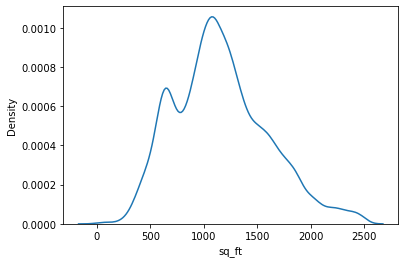

In [104]:
sns.distplot(df["sq_ft"],hist=False)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lm=LinearRegression()

In [107]:
df[:3]

,postedby,uc,rera,bhk,b_r,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,price,city,location,postedby2
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,Ksfc Layout,1
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar,2
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,Jigani,1


In [108]:
df["postedby2"]=df.postedby.replace({"Owner":1,"Dealer":2,"Builder":3})

In [109]:
z=df[["uc","bhk","sq_ft","rera","resale","postedby2","move_ready","LONGITUDE","LATITUDE"]]

In [110]:
lm.fit(z,df["price"])

LinearRegression()

In [111]:
lm.intercept_

211.3803055428043

In [112]:
lm.coef_

array([ 1.65856111,  6.15760547,  0.03352856,  5.67396808,  9.46018683,
       18.12787101, -1.65856111, -1.35590632, -2.73849631])

In [113]:
Y_hat=lm.predict(z)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


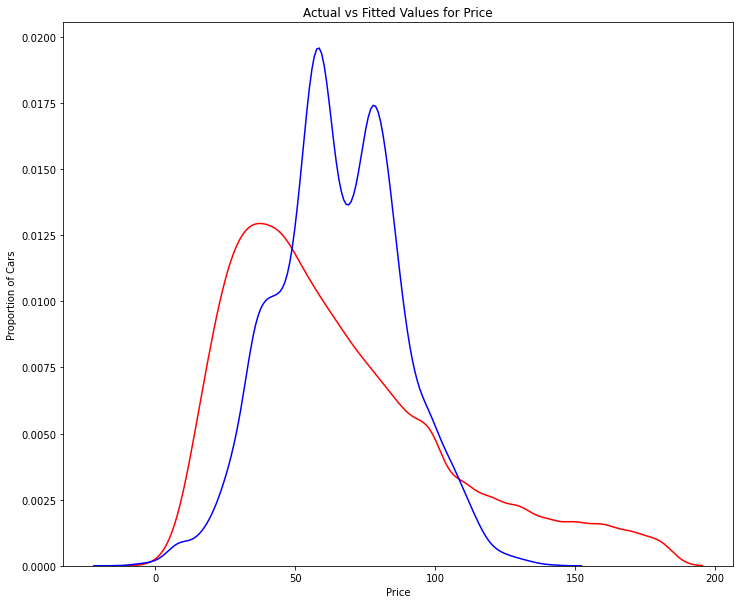

In [114]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(df["price"], hist=False, color="r",label="Actual Value")
sns.distplot(Y_hat,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [115]:
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.3319695189452657


In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  1002.1558119049614


# Testing the Sklearn Model

In [119]:
df2=pd.read_csv(r"D:\Aditi_2021\ML\Kaggle_Housing\test.csv")

In [120]:
df2["postedby2"]=df2.postedby.replace({"Owner":1,"Dealer":2,"Builder":3})
df2.drop(["postedby"],inplace=True,axis=1)
df2.drop(["address"],inplace=True,axis=1)

In [121]:
df2[:2]

,uc,rera,bhk,b_r,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,postedby2
0,0,0,1,BHK,545.17134,1,1,21.262000,73.047700,1
1,1,1,2,BHK,800.00000,0,0,18.966114,73.148278,2


In [122]:
Xtest=df2[["bhk","sq_ft"]]
Xtestarr=scaler.transform(Xtest)

In [123]:
w=df2[["uc","bhk","sq_ft","rera","move_ready","resale","postedby2","LONGITUDE","LATITUDE"]]

In [124]:
df_dum2=pd.get_dummies(w)

In [125]:
test=lm.predict(w)

In [127]:
pd.DataFrame(test).to_csv('D:\Aditi_2021\ML\Kaggle_Housing\FinalSubmission3.csv')

In [129]:
df3=pd.read_csv(r"D:\Aditi_2021\ML\Kaggle_Housing\FinalSubmission3.csv")
df3[:3]

,Unnamed: 0,0
0,0,32.876082
1,1,28.501210
2,2,17.166581


# Summary Using Statsmodel.api

In [130]:
import statsmodels.api as sm

In [131]:
df_model=df[['postedby', 'uc', 'rera', 'bhk', 'b_r', 'sq_ft', 'move_ready', 'resale', 'price',"LONGITUDE","LATITUDE"]]

In [132]:
df_dum=pd.get_dummies(df_model)

In [133]:
x=df_dum.drop("price",axis=1)
y=df_dum.price.values

In [134]:
x_sm=x=sm.add_constant(x)

In [135]:
model=sm.OLS(y,x_sm)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:39:32   Log-Likelihood:            -1.1134e+05
No. Observations:               22945   AIC:                         2.227e+05
Df Residuals:                   22934   BIC:                         2.228e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              100.9112      3.105     32.504      0.000      94.826     106.996
uc                  51.9058      1.583     32.794      0.000      48.803      55.008
rera                 4.3426      0.496      8.760      0.000       3.371       5.314
bhk                  5.7832      0.489     11.826      0.000       4.825       6.742
sq_ft                0.0339      0.001     41.797      0.000       0.032       0.036
move_ready          49.0055      1.583     30.964      0.000      45.903      52.108
resale              -6.7376      1.067     -6.317      0.000      -8.828      -4.647
LONGITUDE           -1.4019      0.034    -41.600      0.000      -1.468      -1.336
LATITUDE            -2.4914      0.085    -29.464      0.000      -2.657      -2.326
postedby_Builder    19.5311      1.525     12.810      0.000      16.543      22.520
postedby_Dealer     51.7786      1.149     45.053      0.000      49.526      54.031
postedby_Owner      29.6015      1.235     23.976      0.000      27.182      32.022
b_r_BHK             45.1145      2.888     15.621      0.000      39.454      50.775
b_r_RK              55.7967      4.186     13.329      0.000      47.592      64.002
==============================================================================
Omnibus:                     3408.271   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5482.971
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       4.244   Cond. No.                     7.61e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:xlabel='sq_ft', ylabel='price'>

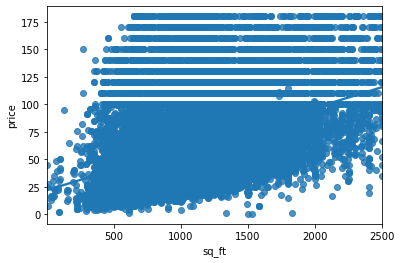

In [136]:
sns.regplot(x="sq_ft",y="price",data=df)